In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [3]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [5]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [7]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(7,activation='softmax'))

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Custom function to add Gaussian noise
def add_gaussian_noise(img, mean=0, std=0.1):
    noise = np.random.normal(mean, std, img.shape)
    noisy_img = np.clip(img + noise, 0, 1)  # Clip to ensure pixel values remain in [0, 1]
    return noisy_img

# Custom DataGenerator with Gaussian noise
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, generator, add_noise=False, multiply_times=3):
        """
        Initializes the custom generator.
        :param generator: ImageDataGenerator.flow() object.
        :param add_noise: Whether to add Gaussian noise.
        :param multiply_times: How many times to augment the dataset.
        """
        self.generator = generator
        self.add_noise = add_noise
        self.multiply_times = multiply_times

    def __len__(self):
        return len(self.generator) * self.multiply_times

    def __getitem__(self, idx):
        batch_x, batch_y = self.generator[idx % len(self.generator)]
        if self.add_noise:
            batch_x = np.array([add_gaussian_noise(img) for img in batch_x])
        return batch_x, batch_y

# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40  # Add random rotation within the range [-40, 40]
)

# Augmentation for validation
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory for training and validation
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    'E:\\jupyter notebook project\\Deep Learning Project\\dl\\foodclassificationtrainval\\train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'E:\\jupyter notebook project\\Deep Learning Project\\dl\\foodclassificationtrainval\\validation',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Wrap the train_generator with CustomDataGenerator to add Gaussian noise and multiply data
augmented_train_generator = CustomDataGenerator(
    generator=train_generator,
    add_noise=True,
    multiply_times=3  # Increase training data threefold
)


Found 868 images belonging to 7 classes.
Found 221 images belonging to 7 classes.


In [11]:
# Now the labels should be of the correct shape (batch_size, num_classes)
def process(image, label):
    label = tf.cast(label, tf.int32)  # Ensure the label is of integer type
    label = tf.one_hot(label, depth=7)  # One-hot encode for 7 classes
    return image, label

# Apply the process function to train and validation datasets
train_ds = augmented_train_generator
validation_ds = validation_generator


In [13]:
# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
# Fit the model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10


E:\Software\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/84 ━━━━━━━━━━━━━━━━━━━━ 7:59 8s/step - accuracy: 0.2560 - loss: 1.9958

E:\Software\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 794s 9s/step - accuracy: 0.3673 - loss: 1.7286 - val_accuracy: 0.6697 - val_loss: 0.9090
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 819s 10s/step - accuracy: 0.7362 - loss: 0.7580 - val_accuracy: 0.7195 - val_loss: 0.7941
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 784s 9s/step - accuracy: 0.8603 - loss: 0.4286 - val_accuracy: 0.7557 - val_loss: 0.7337
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 929s 11s/step - accuracy: 0.9169 - loss: 0.2747 - val_accuracy: 0.7919 - val_loss: 0.6007
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 757s 9s/step - accuracy: 0.9319 - loss: 0.1991 - val_accuracy: 0.8462 - val_loss: 0.5364
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1073s 13s/step - accuracy: 0.9698 - loss: 0.1264 - val_accuracy: 0.8235 - val_loss: 0.6149
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 828s 9s/step - accuracy: 0.9767 - loss: 0.0925 - val_accuracy: 0.8009 - val_loss: 0.5942
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 700s 8s/step - accuracy: 0.9853 - loss: 0.0673 - val_accuracy: 0.8462 - val_loss

In [17]:
#for multiclass classification
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(validation_ds, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(train_ds, verbose=0)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

Validation Loss: 0.4684
Validation Accuracy: 0.8688


E:\Software\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training Loss: 0.0335
Training Accuracy: 0.9950


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


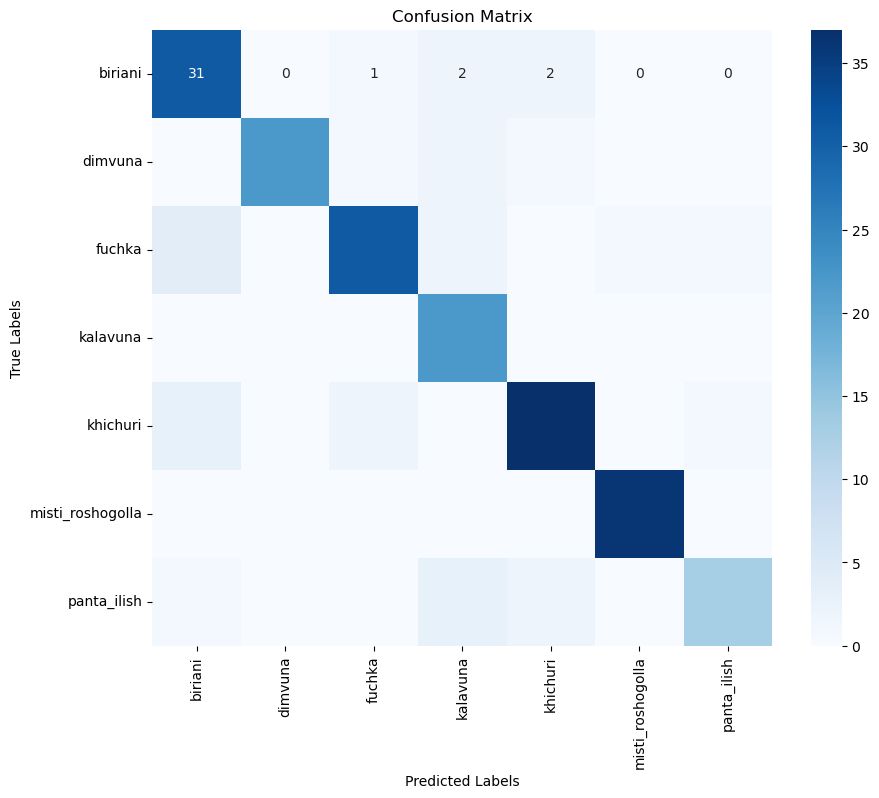

Classification Report:
                  precision    recall  f1-score   support

         biriani     0.7949    0.8611    0.8267        36
         dimvuna     1.0000    0.8462    0.9167        26
          fuchka     0.8857    0.7949    0.8378        39
        kalavuna     0.7097    1.0000    0.8302        22
        khichuri     0.8810    0.8605    0.8706        43
misti_roshogolla     0.9730    1.0000    0.9863        36
     panta_ilish     0.8667    0.6842    0.7647        19

        accuracy                         0.8688       221
       macro avg     0.8730    0.8638    0.8619       221
    weighted avg     0.8785    0.8688    0.8688       221



In [19]:
# Initialize empty lists for true and predicted labels
y_true = []
y_pred = []

# Get predictions and true labels from the test generator
for images, labels in validation_generator:
    # Predict classes for images in the batch
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted class indices
    y_true.extend(np.argmax(labels, axis=1))      # True class indices

    # Break the loop once all samples are processed
    if len(y_true) >= validation_generator.samples:
        break

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(validation_generator.class_indices.keys()),
            yticklabels=list(validation_generator.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:")
report = classification_report(
    y_true, y_pred, target_names=list(validation_generator.class_indices.keys()), digits=4
)
print(report)

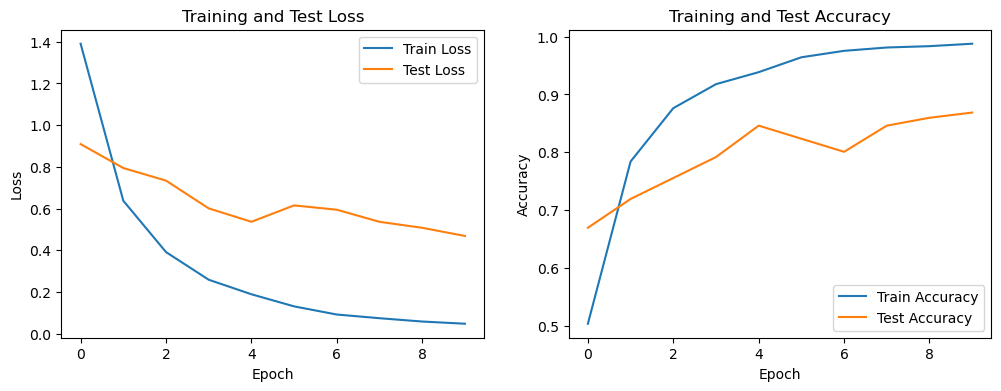

In [21]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')

plt.show()